In [1]:
import sys
sys.path.append('/Users/victoria/Documents/Scripts/Python/DGL-PTM/dgl_ptm')
import torch
import dgl_ptm
import os
os.environ["DGLBACKEND"] = "pytorch"


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


This version features the desired income generation function; a fitted function is used as a decent placeholder to determine consumption. There are many aspects (such as optimization and personal perception of theta) which will be required in future but are currently not utilized. With the model in its current arrangement, the agents stop trading and stabillize after ~7 time steps. I have included a commented-out section at the bottom which uses matplotlib pyplot if you wish to get a quick look.
The current version of the config.yaml file is not formatted correctly and should not be used as is.

In [2]:
model = dgl_ptm.PovertyTrapModel(model_identifier='testwithnn')

In [10]:
model.set_model_parameters(default=False, **{'number_agents': 20000,'seed':1, 'device':"cpu",'step_target': 10,    
'capital_dist': {'type':'uniform','parameters':[0.1,10.],'round':False,'decimals':None}, 
 'steering_parameters': {'npath':'./agent_data_25.zarr',
                            'epath':'./edge_data_25', 
                            'ndata':['all_except',['a_table']],
                            'edata':['all'],
                            'mode':'xarray',
                            'wealth_method':'weighted_transfer',
                            'income_method':'income_generation',
                            'tech_gamma': torch.tensor([0.3,0.35,0.45]),
                            'tech_cost': torch.tensor([0,0.15,0.65]),
                            'consume_method':'estimated_bellman_consumption',
                            'nn_path':'/Users/victoria/Documents/Scripts/Python/DGL-PTM/DGL_testing/nn_data/both_PudgeSixLayer_1024/0409_190204/model_best.pth',
                            'adapt_m':torch.tensor([0,0.5,0.9]),
                            'adapt_cost':torch.tensor([0,0.25,0.45]),
                            'depreciation': 0.6,
                            'discount': 0.95,
                            'm_theta_dist': {'type':'multinomial','parameters':[[0.01 ,0.1, 0.79, 0.1],[0.1, 0.5, 0.8, 1]],'round':False,'decimals':None},
                            'm_attach_dist': {'type':'uniform','parameters':[0.001,1],'round':False,'decimals':None},
                            'del_method': 'size',
                            'del_threshold':None,
                            'noise_ratio':0.05,
                            'local_ratio':0.25,
                            'weight_a':2.09,#2.09 is where the max diff is 0.000001
                            'weight_b':3.3, 
                            'truncation_weight':1.0e-10,
                            'step_type': 'custom'}})

#print(model.number_agents)  
#print(model.nn_path)  
print(model.steering_parameters)                        

{'npath': './agent_data_25.zarr', 'epath': './edge_data_25', 'ndata': ['all_except', ['a_table']], 'edata': ['all'], 'mode': 'xarray', 'wealth_method': 'weighted_transfer', 'income_method': 'income_generation', 'tech_gamma': tensor([0.3000, 0.3500, 0.4500]), 'tech_cost': tensor([0.0000, 0.1500, 0.6500]), 'consume_method': 'estimated_bellman_consumption', 'nn_path': '/Users/victoria/Documents/Scripts/Python/DGL-PTM/DGL_testing/nn_data/both_PudgeSixLayer_1024/0409_190204/model_best.pth', 'adapt_m': tensor([0.0000, 0.5000, 0.9000]), 'adapt_cost': tensor([0.0000, 0.2500, 0.4500]), 'depreciation': 0.6, 'discount': 0.95, 'm_theta_dist': {'type': 'multinomial', 'parameters': [[0.01, 0.1, 0.79, 0.1], [0.1, 0.5, 0.8, 1]], 'round': False, 'decimals': None}, 'm_attach_dist': {'type': 'uniform', 'parameters': [0.001, 1], 'round': False, 'decimals': None}, 'del_prob': 0.0, 'noise_ratio': 0.05, 'local_ratio': 0.25, 'weight_a': 2.09, 'weight_b': 3.3, 'truncation_weight': 1e-10, 'step_type': 'custom'}

In [11]:
model.initialize_model()

using seed 0 for network creation.
1 0
Created graph with 20000 agents.
At initialization, graph has 0 auto edges and 0 duplicate edges.


In [9]:
model.run()
#100,000 took about 1.5 min on CPU
#1,000,000 took about 16 min on CPU
#need to tune characteristic distance


performing step 1 of 10
Initial edges: 39998
Agents in violation: 1381
...because of i_a: 0
performing step 2 of 10
Initial edges: 39998
Agents in violation: 170
...because of i_a: 0
performing step 3 of 10
Initial edges: 39998
Agents in violation: 316
...because of i_a: 0
performing step 4 of 10
Initial edges: 39998
Agents in violation: 521
...because of i_a: 0
performing step 5 of 10
Initial edges: 39998
Agents in violation: 585
...because of i_a: 0
performing step 6 of 10
Initial edges: 39998
Agents in violation: 789
...because of i_a: 0
performing step 7 of 10
Initial edges: 39998
Agents in violation: 1342
...because of i_a: 0
performing step 8 of 10
Initial edges: 39998
Agents in violation: 1321
...because of i_a: 0
performing step 9 of 10
Initial edges: 39998
Agents in violation: 2261
...because of i_a: 0
performing step 10 of 10
Initial edges: 39998
Agents in violation: 2018
...because of i_a: 0


In [6]:
import dgl

src_ids = torch.tensor([1, 2, 2, 4, 4,0,0])
dst_ids = torch.tensor([4, 3, 0, 0, 1,2,3])
g = dgl.graph((src_ids, dst_ids), num_nodes=5)
print(g.edges(order='eid'))
print(g.nodes())
print(torch.sum(g.has_edges_between(g.nodes(), g.nodes())))

connecting_nodes=torch.tensor([1,2,3,4,0])
sample = dgl.sampling.sample_neighbors(g, connecting_nodes, 2, edge_dir ="out")
print(sample.edges(order='eid'))

#isolate and delete edges with no partner
print(sample.out_degrees(connecting_nodes))
sample.ndata['out_degree'] = sample.out_degrees()

print(sample.ndata['out_degree'])

print(sample.ndata['out_degree'] == 2)

#def nodes_without_two_neighbors(nodes):
    #return (nodes.data['out_degree'] != 2)

#print(sample.filter_nodes(nodes_without_two_neighbors))
#insufficient_connections=sample.filter_nodes(nodes_without_two_neighbors)

# Edges from nodes with insufficient connections
def edges_to_remove(edges):
    print(f"here:{edges.src['out_degree']}")
    return (edges.src['out_degree'] != 2)

insufficient_connections = sample.filter_edges(edges_to_remove)

print(insufficient_connections)

sample.remove_edges(insufficient_connections)
print(sample.edges(order='eid'))
print(sample.edges(order='eid')[1])

even_indices_tensor = sample.edges(order='eid')[1][::2]
odd_indices_tensor = sample.edges(order='eid')[1][1::2]
existing_connections = g.has_edges_between(even_indices_tensor, odd_indices_tensor)
print(f'even_indices_tensor:{even_indices_tensor}')
print(f'odd_indices_tensor:{odd_indices_tensor}')
print(f'existing_connections:{existing_connections}')
print(~existing_connections)


even_indices_tensor = sample.edges(order='eid')[1][::2][~existing_connections]
odd_indices_tensor = sample.edges(order='eid')[1][1::2][~existing_connections]
prob_tensor = torch.rand(even_indices_tensor.size(0))


print(even_indices_tensor)
print(odd_indices_tensor)
print(prob_tensor)

successful_links = prob_tensor > 0.5
print(successful_links)
#add "new" edges to the original graph

g.add_edges(even_indices_tensor[successful_links], odd_indices_tensor[successful_links])
print(g.edges(order='eid'))

g.add_edges(even_indices_tensor[successful_links], odd_indices_tensor[successful_links])

print(g.edges(order='eid'))

ten=torch.tensor([1,2,3,4,5,6,7,8,9,10])
print(ten.shape)






(tensor([1, 2, 2, 4, 4, 0, 0]), tensor([4, 3, 0, 0, 1, 2, 3]))
tensor([0, 1, 2, 3, 4])
tensor(0)
(tensor([1, 2, 2, 4, 4, 0, 0]), tensor([4, 3, 0, 0, 1, 3, 2]))
tensor([1, 2, 0, 2, 2])
tensor([2, 1, 2, 0, 2])
tensor([ True, False,  True, False,  True])
here:tensor([1, 2, 2, 2, 2, 2, 2])
tensor([0])
(tensor([2, 2, 4, 4, 0, 0]), tensor([3, 0, 0, 1, 3, 2]))
tensor([3, 0, 0, 1, 3, 2])
even_indices_tensor:tensor([3, 0, 3])
odd_indices_tensor:tensor([0, 1, 2])
existing_connections:tensor([False, False, False])
tensor([True, True, True])
tensor([3, 0, 3])
tensor([0, 1, 2])
tensor([0.5953, 0.8332, 0.8188])
tensor([True, True, True])
(tensor([1, 2, 2, 4, 4, 0, 0, 3, 0, 3]), tensor([4, 3, 0, 0, 1, 2, 3, 0, 1, 2]))
(tensor([1, 2, 2, 4, 4, 0, 0, 3, 0, 3, 3, 0, 3]), tensor([4, 3, 0, 0, 1, 2, 3, 0, 1, 2, 0, 1, 2]))
torch.Size([10])


In [7]:
import dgl.sparse as spmatrix
n_FoF_links = 2
src_ids = torch.tensor([1, 4, 2, 3, 2, 0, 4, 0, 0, 3])
dst_ids = torch.tensor([4, 1, 3, 2, 0, 2, 0, 4, 3, 0])
g = dgl.graph((src_ids, dst_ids), num_nodes=10)
print(g.edges(order='eid'))

g.ndata['wealth'] = torch.tensor([1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 10])


adjacency_matrix = g.adj()
print(adjacency_matrix)
candidates=adjacency_matrix.sum(dim=1)>1
print(candidates)
print(torch.sum(candidates))

connecting_nodes=torch.randint(0,torch.sum(candidates),(n_FoF_links,))
print(sample)
#Edges from nodes with insufficient connections
#def edges_to_keep(edges):
#    return (spmatrix.sum(adjacency_matrix, dim=1)>1)

#sufficient_connections = g.filter_edges(edges_to_keep)
#print(sufficient_connections)

sample = dgl.sampling.sample_neighbors(g, connecting_nodes, 2, edge_dir ="out")
even_indices_tensor = sample.edges(order='eid')[1][::2]
odd_indices_tensor = sample.edges(order='eid')[1][1::2]
existing_connections = g.has_edges_between(even_indices_tensor, odd_indices_tensor)


print(sample.edges(order='eid'))
print(sample.ndata['wealth'])

even_indices_tensor = sample.edges(order='eid')[1][::2][~existing_connections]
odd_indices_tensor = sample.edges(order='eid')[1][1::2][~existing_connections]
prob_tensor = torch.rand(even_indices_tensor.size(0))
print(sample.ndata['wealth'][even_indices_tensor])
homophily_parameter=0.69
characteristic_distance=.25
wealth_diff = sample.ndata['wealth'][even_indices_tensor] - sample.ndata['wealth'][odd_indices_tensor]
potential_weights = 1./(1. + torch.exp(homophily_parameter*(torch.abs(wealth_diff)-characteristic_distance)))
print(potential_weights)
print(prob_tensor<potential_weights)

successful_links = prob_tensor < potential_weights

g.add_edges(even_indices_tensor[successful_links], odd_indices_tensor[successful_links])
print(g.edges(order='eid'))

g.add_edges(odd_indices_tensor[successful_links], even_indices_tensor[successful_links])

print(g.edges(order='eid'))


(tensor([1, 4, 2, 3, 2, 0, 4, 0, 0, 3]), tensor([4, 1, 3, 2, 0, 2, 0, 4, 3, 0]))
SparseMatrix(indices=tensor([[1, 4, 2, 3, 2, 0, 4, 0, 0, 3],
                             [4, 1, 3, 2, 0, 2, 0, 4, 3, 0]]),
             values=tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
             shape=(10, 10), nnz=10)
tensor([ True, False,  True,  True,  True, False, False, False, False, False])
tensor(4)
Graph(num_nodes=5, num_edges=6,
      ndata_schemes={'out_degree': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64)})
(tensor([3, 3, 1]), tensor([2, 0, 4]))
tensor([ 1.0000,  1.2000,  1.3000,  1.4000,  1.5000,  1.6000,  1.7000,  1.8000,
         1.9000, 10.0000])


IndexError: The shape of the mask [2] at index 0 does not match the shape of the indexed tensor [1] at index 0

In [ ]:
import dgl.sparse as spmatrix
n_FoF_links = 3
src_ids = torch.tensor([1, 4, 2, 3, 2, 0, 4, 0, 0, 3])
dst_ids = torch.tensor([4, 1, 3, 2, 0, 2, 0, 4, 3, 0])
g = dgl.graph((src_ids, dst_ids), num_nodes=10)
print(g.edges(order='eid'))

g.ndata['wealth'] = torch.tensor([1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 10])


adjacency_matrix = g.adj()
print(adjacency_matrix)
candidates=adjacency_matrix.sum(dim=1)>1

print(torch.nonzero(candidates, as_tuple=True))

print(torch.sum(candidates))

#sample=g.remove_edges(~candidates).nodes()[connecting_nodes]

connecting_nodes=torch.nonzero(candidates, as_tuple=True)[0][torch.randint(0,torch.sum(candidates),(n_FoF_links,))]
print(connecting_nodes)

sample = dgl.sampling.sample_neighbors(g, connecting_nodes, 2, replace = False, edge_dir ="out")

print(sample.edges(order='eid'))


print(len(sample.edges(order='eid')))

assert len(sample.edges(order='eid')) % 2 == 0, "The number of elements in the tensor should be even."

print(sample.edges(order='eid')[1].view(-1, 2))
print(torch.unique(sample.edges(order='eid')[1].view(-1, 2), dim=0)[(torch.unique(sample.edges(order='eid')[1].view(-1, 2), dim=0)[:, 0] != torch.unique(sample.edges(order='eid')[1].view(-1, 2), dim=0)[:, 1])])
print(torch.unique(sample.edges(order='eid')[1].view(-1, 2), dim=0)[:,0])
print(torch.unique(sample.edges(order='eid')[1].view(-1, 2), dim=0)[:,1])
print(torch.unique(sample.edges(order='eid')[1].view(-1, 2), dim=0).size(0))


even_indices_tensor = torch.unique(sample.edges(order='eid')[1].view(-1, 2), dim=0)[:,0]
odd_indices_tensor = torch.unique(sample.edges(order='eid')[1].view(-1, 2), dim=0)[:,1]
existing_connections = g.has_edges_between(even_indices_tensor, odd_indices_tensor)
even_indices_tensor = even_indices_tensor[~existing_connections]
odd_indices_tensor = odd_indices_tensor[~existing_connections]
prob_tensor = torch.rand(even_indices_tensor.size(0))

homophily_parameter=0.69
characteristic_distance=.25
truncation_weight=1.0e-10
wealth_diff = sample.ndata['wealth'][even_indices_tensor] - sample.ndata['wealth'][odd_indices_tensor]
potential_weights = 1./(1. + torch.exp(homophily_parameter*(torch.abs(wealth_diff)-characteristic_distance)))
finiteweights = torch.isfinite(potential_weights)
potential_weights[~finiteweights] = 0.
potential_weights = torch.where( potential_weights > truncation_weight, potential_weights, truncation_weight)

print(even_indices_tensor)
print(odd_indices_tensor)
print(potential_weights)
print(prob_tensor<potential_weights)


(tensor([1, 4, 2, 3, 2, 0, 4, 0, 0, 3]), tensor([4, 1, 3, 2, 0, 2, 0, 4, 3, 0]))
SparseMatrix(indices=tensor([[1, 4, 2, 3, 2, 0, 4, 0, 0, 3],
                             [4, 1, 3, 2, 0, 2, 0, 4, 3, 0]]),
             values=tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
             shape=(10, 10), nnz=10)
(tensor([0, 2, 3, 4]),)
tensor(4)
tensor([4, 4, 0])
(tensor([4, 4, 4, 4, 0, 0]), tensor([0, 1, 1, 0, 4, 2]))
2
tensor([[0, 1],
        [1, 0],
        [4, 2]])
tensor([[0, 1],
        [1, 0],
        [4, 2]])
tensor([0, 1, 4])
tensor([1, 0, 2])
3
tensor([0, 1, 4])
tensor([1, 0, 2])
tensor([0.5086, 0.5086, 0.5086])
tensor([ True, False,  True])


In [ ]:
n_perturbances = 3
src_ids = torch.tensor([1, 4, 2, 3, 2, 0, 4, 0, 0, 3])
dst_ids = torch.tensor([4, 1, 3, 2, 0, 2, 0, 4, 3, 0])
g = dgl.graph((src_ids, dst_ids), num_nodes=7)
g.edata['weight'] = torch.tensor([0.1,0.1,0,0,0,0,0,0,0,0])
print(g.edges(order='eid'))
print(g.nodes().shape[0])

node_pairs,_=torch.sort(torch.stack((torch.randint(0,g.nodes().shape[0],(n_perturbances,)),torch.randint(0,g.nodes().shape[0],(n_perturbances,))), dim=1), dim=1)
print(node_pairs)

node_pairs = torch.unique(node_pairs, dim=0)
print(node_pairs)

node_pairs = node_pairs[(node_pairs[:, 0] != node_pairs[:, 1])]
print(node_pairs)



existing_connections = g.has_edges_between(node_pairs[:,0], node_pairs[:,1])
print(existing_connections)
existing_i_tensor = node_pairs[:,0][existing_connections]
existing_j_tensor = node_pairs[:,1][existing_connections]
print(existing_i_tensor)
existing_forward = g.edge_ids(node_pairs[:,0][existing_connections], node_pairs[:,1][existing_connections])
existing_reverse = g.edge_ids(node_pairs[:,1][existing_connections], node_pairs[:,0][existing_connections])
 
print(existing_forward)
print(existing_reverse)
g.remove_edges(torch.cat((existing_forward, existing_reverse)))
print(g.edges(order='eid'))
random_weights = torch.rand(node_pairs.size(0))
print(random_weights)

g.add_edges(node_pairs[:, 0], node_pairs[:, 1],{'weight': random_weights})
g.add_edges(node_pairs[:, 1], node_pairs[:, 0],{'weight': random_weights})


print(g.edges(order='eid'))
print(g.edata['weight'])


#forward_ids = g.edge_ids(node_pairs[:, 0], node_pairs[:, 1])
#reverse_ids = g.edge_ids(node_pairs[:, 1], node_pairs[:, 0])


#def random_weight(edges):
#    print(edges.edges()[2])
#    print (random_weights[forward_ids==edges.edges()[2]])
#    return {'weight': random_weights[forward_ids==edges.edges()[2]]}

#g.apply_edges(random_weight, edges = forward_ids)

#g.apply_edges(lambda edges : print(edges.src['wealth']), (node_pairs[:, 0],node_pairs[:, 1]))


#print(g.edata['weight'])




(tensor([1, 4, 2, 3, 2, 0, 4, 0, 0, 3]), tensor([4, 1, 3, 2, 0, 2, 0, 4, 3, 0]))
7
tensor([[1, 6],
        [4, 6],
        [3, 5]])
tensor([[1, 6],
        [3, 5],
        [4, 6]])
tensor([[1, 6],
        [3, 5],
        [4, 6]])
tensor([False, False, False])
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
(tensor([1, 4, 2, 3, 2, 0, 4, 0, 0, 3]), tensor([4, 1, 3, 2, 0, 2, 0, 4, 3, 0]))
tensor([0.9175, 0.7711, 0.2704])
(tensor([1, 4, 2, 3, 2, 0, 4, 0, 0, 3, 1, 3, 4, 6, 5, 6]), tensor([4, 1, 3, 2, 0, 2, 0, 4, 3, 0, 6, 5, 6, 1, 3, 4]))
tensor([0.1000, 0.1000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.9175, 0.7711, 0.2704, 0.9175, 0.7711, 0.2704])


In [ ]:
src_ids = torch.tensor([1, 4, 2, 3, 2, 0, 4, 0, 0, 3,0])
dst_ids = torch.tensor([4, 1, 3, 2, 0, 2, 0, 4, 3, 0,3])
n_to_del = 2
g = dgl.graph((src_ids, dst_ids), num_nodes=7)
g.edata['weight'] = torch.tensor([0.1,0.1,0,0,0,0,0,0,0,0,0])
print(g.edges(order='eid'))
print(g.nodes().shape[0])

def _sparse_upper_triangular(spm):
    """
    Select the upper triangular matrix from a sparse matrix.

    Args:
        spm: the sparse matrix (dgl.sparse.SparseMatrix)
        
    Return: dgl.sparse.SparseMatrix
    """
    mask = spm.row < spm.col
    return _sparse_matrix_apply_mask(spm, mask)

def _sparse_matrix_apply_mask(om, mask):
    """
    apply mask to a sparse matrix and return an appropriately masked sparse matrix

    Args:
        om: the original sparse matrix (dgl.sparse.SparseMatrix)
        mask: the mask to be applied (tensor)
    
    Return: dgl.sparse.SparseMatrix
    """
    return dgl.sparse.from_coo(om.row[mask], om.col[mask], om.val[mask], shape=om.shape)

def _symmetrical_from_upper_triangular(triu):
    """
    Create a symmetrical matrix based on an input upper triangular matrix.
    Note, this works because the diagonal is zero as we have no self-loops.

    Args:
        triu: upper triangular matrix
    
    Return: dgl.sparse.SparseMatrix
    """
    return triu + triu.T

upper_triangular = _sparse_upper_triangular(g.adj())
print(upper_triangular) 
mask_edges=torch.randperm(upper_triangular.val.size()[0])[0:n_to_del]
print(mask_edges)

deletion_matrix_upper_tri = _sparse_matrix_apply_mask(upper_triangular, mask_edges)
print(deletion_matrix_upper_tri)

deletion_matrix = _symmetrical_from_upper_triangular(deletion_matrix_upper_tri)

print(deletion_matrix)
print(g.edge_ids(deletion_matrix.row, deletion_matrix.col))



(tensor([1, 4, 2, 3, 2, 0, 4, 0, 0, 3, 0]), tensor([4, 1, 3, 2, 0, 2, 0, 4, 3, 0, 3]))
7
SparseMatrix(indices=tensor([[1, 2, 0, 0, 0, 0],
                             [4, 3, 2, 4, 3, 3]]),
             values=tensor([1., 1., 1., 1., 1., 1.]),
             shape=(7, 7), nnz=6)
tensor([1, 5])
SparseMatrix(indices=tensor([[2, 0],
                             [3, 3]]),
             values=tensor([1., 1.]),
             shape=(7, 7), nnz=2)
SparseMatrix(indices=tensor([[0, 2, 3, 3],
                             [3, 3, 0, 2]]),
             values=tensor([1., 1., 1., 1.]),
             shape=(7, 7), nnz=4)
tensor([8, 2, 9, 3])


In [ ]:
#Checks
src_ids = torch.tensor([1, 4, 2, 3, 2, 0, 4, 0, 0, 3,0])
dst_ids = torch.tensor([4, 1, 3, 2, 0, 2, 0, 4, 3, 0,3])
g = dgl.graph((src_ids, dst_ids), num_nodes=7)
g.add_edges(torch.tensor([0]),torch.tensor([0]))
print(g.edges(order='eid'))
print(torch.stack((g.edges(order='eid')[0],g.edges(order='eid')[1]),dim=1))
print(torch.sum(g.edges(order='eid')[0]==g.edges(order='eid')[1]))
print(g.edges(order='eid')[0].size(0)-torch.unique(torch.stack((g.edges(order='eid')[0],g.edges(order='eid')[1]), dim=1),dim=0).size(0))

(tensor([1, 4, 2, 3, 2, 0, 4, 0, 0, 3, 0, 0]), tensor([4, 1, 3, 2, 0, 2, 0, 4, 3, 0, 3, 0]))
tensor([[1, 4],
        [4, 1],
        [2, 3],
        [3, 2],
        [2, 0],
        [0, 2],
        [4, 0],
        [0, 4],
        [0, 3],
        [3, 0],
        [0, 3],
        [0, 0]])
tensor(1)
1


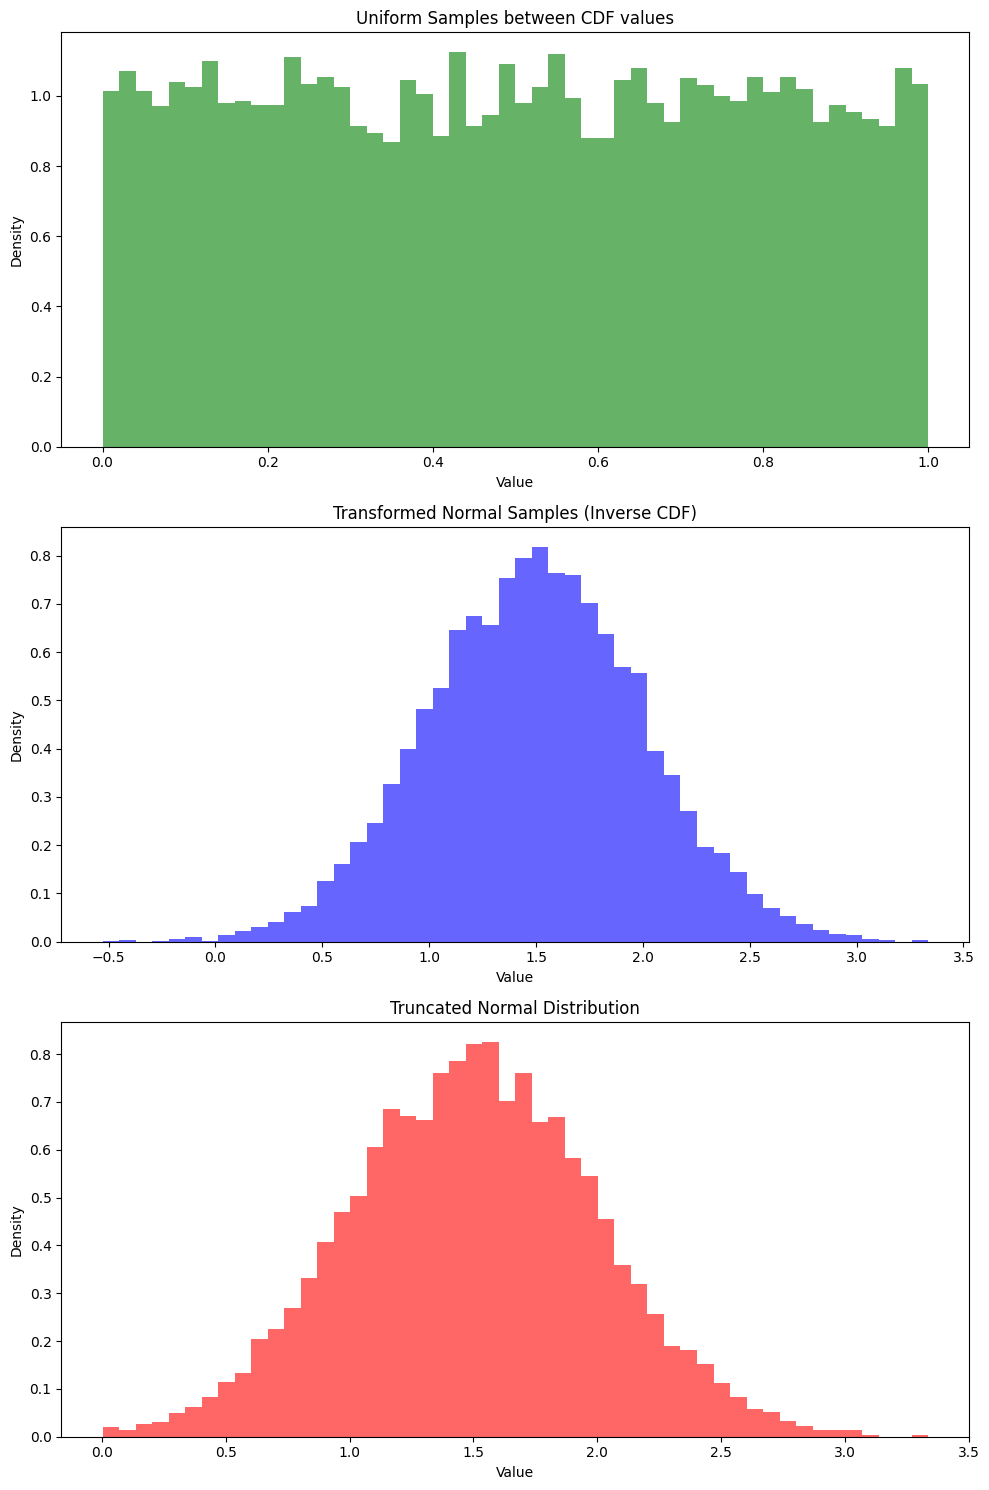

In [18]:
import torch
import math
import matplotlib.pyplot as plt

def truncated_normal(size, mean=0.0, std=1.0, a=0.0, b=float('inf')):
    # Define the standard normal CDF and its inverse using PyTorch functions
    #cdf in terms of error function (1+erf(x/sqrt(2)))/2 
    """     normal_cdf = lambda x: (1 + torch.erf(x / torch.sqrt(torch.tensor(2))))/2
    normal_ppf = lambda p: torch.sqrt(torch.tensor(2.0)) * torch.erfinv(2 * p - 1)
    
    # Compute the CDF values at the truncation points
    alpha = (a - mean) / std
    beta = (b - mean) / std
    alpha_cdf = normal_cdf(torch.tensor(alpha))
    beta_cdf = normal_cdf(torch.tensor(beta))
    
    # Sample uniformly in the CDF range
    uniform_samples = torch.rand(size)
    
    # Transform uniform samples to truncated normal samples
    truncated_normal_samples = normal_ppf(alpha_cdf + (beta_cdf - alpha_cdf) * uniform_samples)
    
    # Scale and shift the samples
    truncated_normal_samples = mean + std * truncated_normal_samples
     """
    trunc_val_a = (a-mean)/std
    trunc_val_b = (b-mean)/std
    cdf_min = (1 + torch.erf(trunc_val_a / torch.sqrt(torch.tensor(2.0))))/2
    cdf_max = (1 + torch.erf(trunc_val_b / torch.sqrt(torch.tensor(2.0))))/2

    uniform_samples = torch.rand(size)
    sample_ppf = torch.sqrt(torch.tensor(2.0)) * torch.erfinv(2 *(cdf_min + (cdf_max - cdf_min) * uniform_samples) - 1)

    dist = mean + std * sample_ppf
    return dist, uniform_samples

# Parameters
n = 10000  # Length of the truncated normal distribution
mean = 1.5  # Mean of the normal distribution
std = 0.5  # Standard deviation of the normal distribution

# Generate truncated normal samples
truncated_samples, uniform_samples = truncated_normal(n, mean, std)

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Uniform samples
axs[0].hist(uniform_samples.numpy(), bins=50, density=True, alpha=0.6, color='g')
axs[0].set_title('Uniform Samples between CDF values')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Density')

# Transformed normal samples
transformed_samples = torch.erfinv(2 * uniform_samples - 1) * torch.sqrt(torch.tensor(2.0)) * std + mean
axs[1].hist(transformed_samples.numpy(), bins=50, density=True, alpha=0.6, color='b')
axs[1].set_title('Transformed Normal Samples (Inverse CDF)')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Density')

# Truncated normal samples
axs[2].hist(truncated_samples.numpy(), bins=50, density=True, alpha=0.6, color='r')
axs[2].set_title('Truncated Normal Distribution')
axs[2].set_xlabel('Value')
axs[2].set_ylabel('Density')

plt.tight_layout()
plt.show()


In [ ]:
'''
# try to see something happening
import zarr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation



agent_data = zarr.open('/Users/victoria/Documents/Scripts/Python/DGL-PTM/DGL_testing/agent_data.zarr', mode='r')
alpha=pd.DataFrame(agent_data['alpha'])
net_trade=pd.DataFrame(agent_data['net_trade'])
k=pd.DataFrame(agent_data['wealth'])

fig=plt.figure()
plt.xlabel("α")
plt.ylabel("$k_{t}$")
#xlims=[0.8,OGdata.loc[TimeSample,"alpha"].max()]
xlims=[0.8,1.5]

ylims=[0,10]
#ylims=[0,OGdata.loc[TimeSample,"k_t"].max()]

fig.suptitle(f"k$_{{{'t'}}}$ v.s. α at Time Step {0}")



def animate3(i,alpha, k,net_trade, xlim,ylim):

    plt.clf()
    fig.suptitle(f"k$_{{{'t'}}}$ v.s. α at Time Step {i}")
    plt.xlabel("α")
    plt.ylabel("$k_{t}$")
    pointart=plt.scatter(alpha[i], k[i])
    plt.xlim(xlim)
    plt.ylim(ylim)
    snapshot=str(f"Net Traded:{net_trade[i].mean()}")
    fig.text(0.05, 0.021, snapshot,fontsize=10, bbox=dict(fc="white", ec="white"))





points=plt.scatter(alpha[0], k[0])
    #hue="i_a", 
    #palette=["b", "r","#7f7f7f"], 

plt.xlim(xlims)
plt.ylim(ylims)

anim3 = animation.FuncAnimation(fig, animate3, frames=k.shape[1], interval=2000, blit=False, fargs=(alpha,k,net_trade,xlims,ylims,)) 



plt.show()
'''

'\n# try to see something happening\nimport zarr\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport matplotlib.animation as animation\n\n\n\nagent_data = zarr.open(\'/Users/victoria/Documents/Scripts/Python/DGL-PTM/DGL_testing/agent_data.zarr\', mode=\'r\')\nalpha=pd.DataFrame(agent_data[\'alpha\'])\nnet_trade=pd.DataFrame(agent_data[\'net_trade\'])\nk=pd.DataFrame(agent_data[\'wealth\'])\n\nfig=plt.figure()\nplt.xlabel("α")\nplt.ylabel("$k_{t}$")\n#xlims=[0.8,OGdata.loc[TimeSample,"alpha"].max()]\nxlims=[0.8,1.5]\n\nylims=[0,10]\n#ylims=[0,OGdata.loc[TimeSample,"k_t"].max()]\n\nfig.suptitle(f"k$_{{{\'t\'}}}$ v.s. α at Time Step {0}")\n\n\n\ndef animate3(i,alpha, k,net_trade, xlim,ylim):\n\n    plt.clf()\n    fig.suptitle(f"k$_{{{\'t\'}}}$ v.s. α at Time Step {i}")\n    plt.xlabel("α")\n    plt.ylabel("$k_{t}$")\n    pointart=plt.scatter(alpha[i], k[i])\n    plt.xlim(xlim)\n    plt.ylim(ylim)\n    snapshot=str(f"Net Traded:{net_trade[i].mean()}")\n    fig.text(0.05, 0.021, s